In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA
from utils import *
import os

# Set seaborn style for better visuals
sns.set(style='whitegrid')

### GMM Logic:

In [2]:
# Function to run GMM and evaluate + visualize results, calling methods from utils.py
def run_gmm(X, y_true, n_components, covariance_type='full', title='', reduce_dim=False):
    # Standardize features
    X_scaled = StandardScaler().fit_transform(X)
    
    # Run GMM
    gmm = GaussianMixture(n_components=n_components,
                          covariance_type=covariance_type,
                          random_state=42)
    gmm.fit(X_scaled)
    y_pred = gmm.predict(X_scaled)

    # Number of clusters
    n_clusters = n_components
    
    # Visualization 
    visualize_clustering_results(X_scaled, y_pred, y_true, title=title, reduce_dim=reduce_dim)

    print(f"Number of clusters set: {n_clusters}")
    print("---------------------------------------------")

    # Evaluation Metrics
    evaluate_clustering(X_scaled, y_pred, y_true, n_clusters, title=title)


### Setup datasets and hyperparameters:

In [3]:
# Directory containing datasets
dataset_dir = 'datasets'

# List of dataset filenames and parameters
datasets = [
    {
        'filename': 'isotropic_blobs.csv',
        'title': 'Isotropic Gaussian Blobs',
        'n_components': 3,
        'covariance_type': 'full',
        'reduce_dim': False
    },
    {
        'filename': 'anisotropic_blobs.csv',
        'title': 'Anisotropic Gaussian Blobs',
        'n_components': 3,
        'covariance_type': 'full',
        'reduce_dim': False
    },
    {
        'filename': 'moons_circles.csv',
        'title': 'Moons and Circles',
        'n_components': 4,
        'covariance_type': 'full',
        'reduce_dim': False
    },
    {
        'filename': 'overlapping_clusters.csv',
        'title': 'Overlapping Clusters',
        'n_components': 3,
        'covariance_type': 'full',
        'reduce_dim': False
    },
    {
        'filename': 'high_dimensional_data.csv',
        'title': 'High-Dimensional Data with Noise',
        'n_components': 5,
        'covariance_type': 'full',
        'reduce_dim': True  # Reduce dimensionality for visualization
    },
]

### Main Driver Code:


Processing Isotropic Gaussian Blobs...


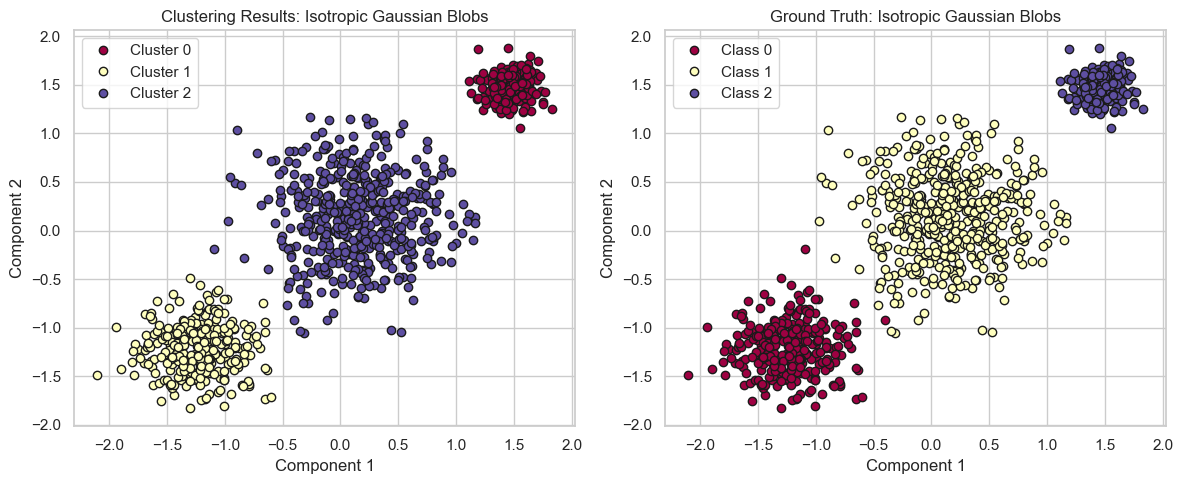

Number of clusters set: 3
---------------------------------------------
Isotropic Gaussian Blobs
Adjusted Mutual Information: 0.9878
V-measure: 0.9878
Silhouette Score: 0.6759

Processing Anisotropic Gaussian Blobs...


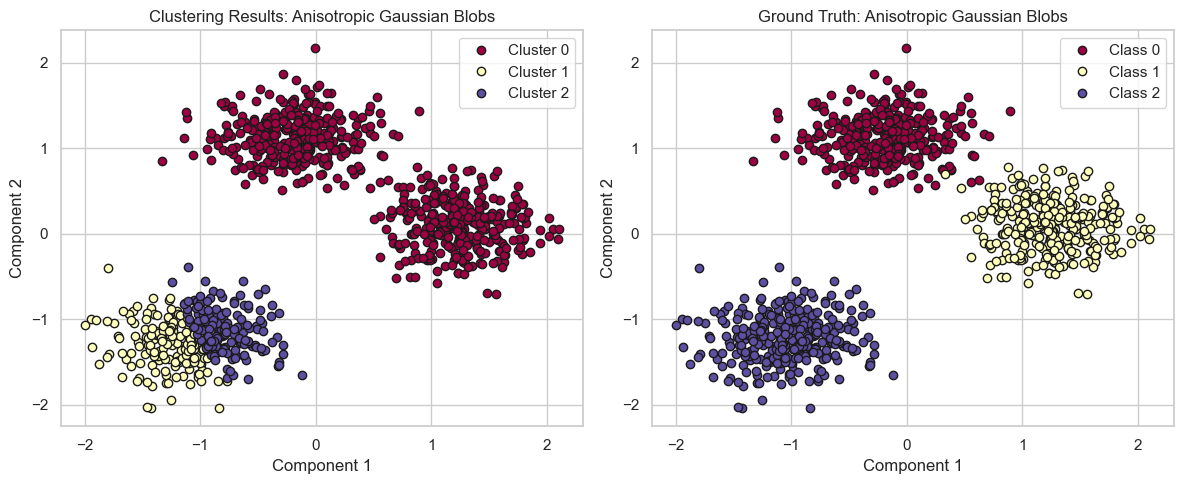

Number of clusters set: 3
---------------------------------------------
Anisotropic Gaussian Blobs
Adjusted Mutual Information: 0.6468
V-measure: 0.6475
Silhouette Score: 0.4506

Processing Moons and Circles...


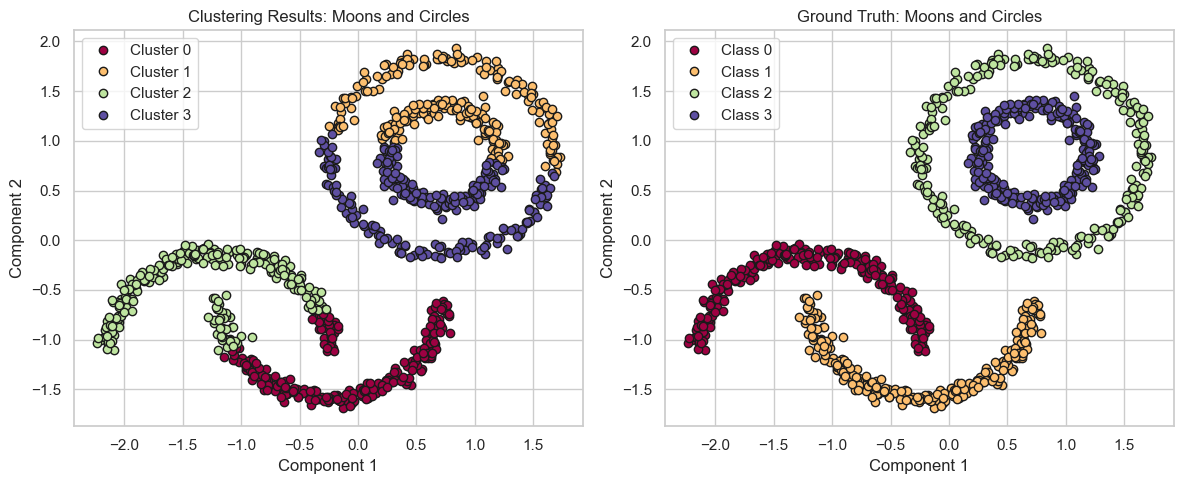

Number of clusters set: 4
---------------------------------------------
Moons and Circles
Adjusted Mutual Information: 0.5966
V-measure: 0.5979
Silhouette Score: 0.3995

Processing Overlapping Clusters...


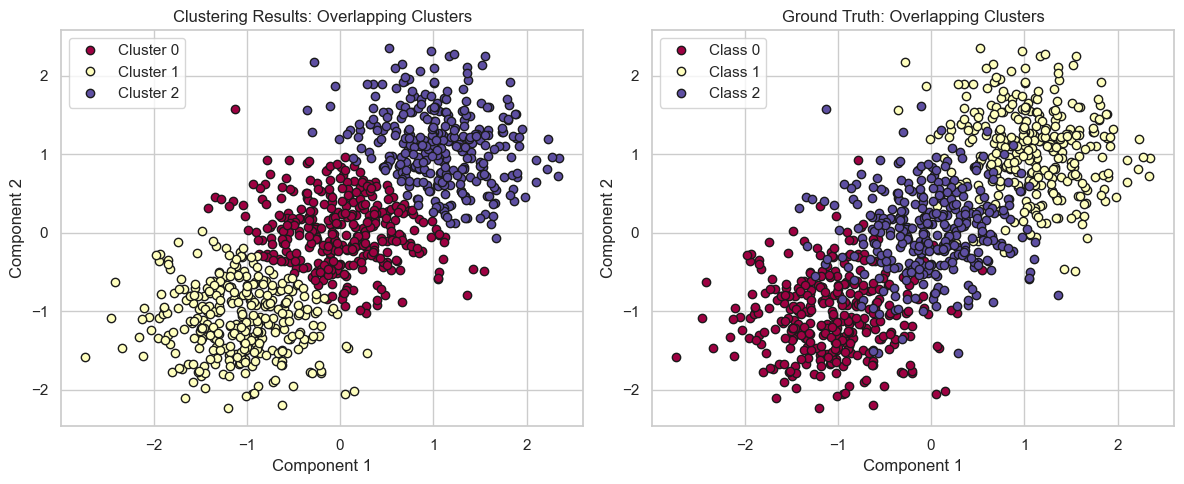

Number of clusters set: 3
---------------------------------------------
Overlapping Clusters
Adjusted Mutual Information: 0.6562
V-measure: 0.6568
Silhouette Score: 0.4499

Processing High-Dimensional Data with Noise...
Data will be reduced to 2D using PCA for visualization.


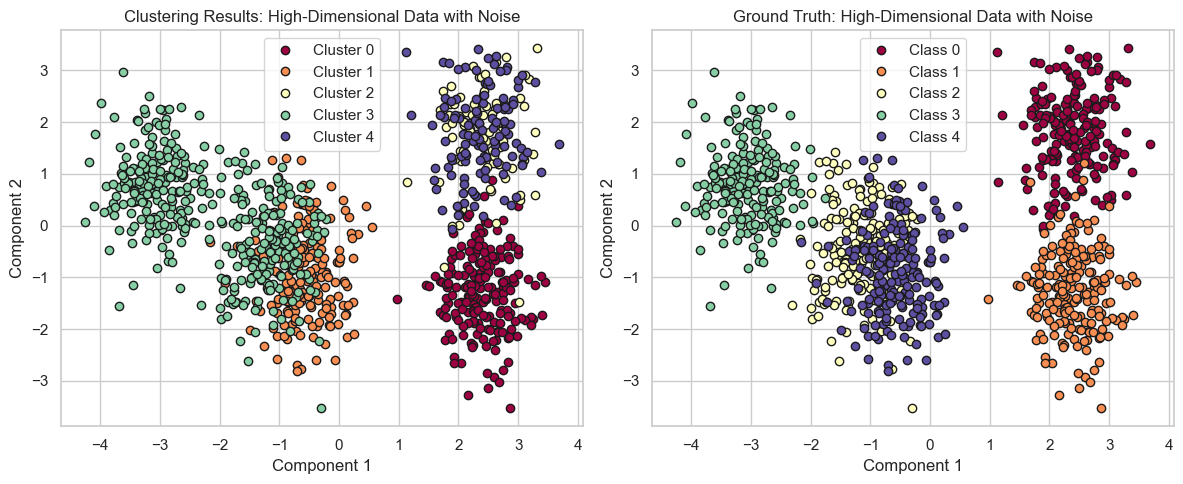

Number of clusters set: 5
---------------------------------------------
High-Dimensional Data with Noise
Adjusted Mutual Information: 0.8408
V-measure: 0.8416
Silhouette Score: 0.0396


In [4]:
# Run GMM on each dataset
for data_info in datasets:
    print(f"\nProcessing {data_info['title']}...")
    filepath = os.path.join(dataset_dir, data_info['filename'])
    X, y_true = load_dataset(filepath)
    run_gmm(X, y_true,
            n_components=data_info['n_components'],
            covariance_type=data_info['covariance_type'],
            title=data_info['title'],
            reduce_dim=data_info['reduce_dim'])